<a href="https://colab.research.google.com/github/Maykol0721/AlphaEarth---Prueba-/blob/main/notebooks/thresholding_images_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Histograms and binary images

Fernando Quintero  
Universidad Tecnológica de Bolívar


In [1]:
# import cv2 as cv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image


Grayscale image


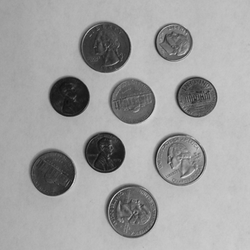

In [2]:
IMAGE_URL = 'https://github.com/agmarrugo/computer-vision-utb/blob/main/data/coins.png?raw=true'

# urllib.request.urlretrieve(IMAGE_URL, 'coins.png')

image = io.imread(IMAGE_URL)
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
# cv2.imshow("Image", image)

# plt.imshow(image)
print("Grayscale image")
cv2_imshow(image)

### Thresholding

Thresholding is the binarization of an image. In general,
we seek to convert a grayscale image to a binary image,
where the pixels are either 0 or 255.
A simple thresholding example would be selecting a pixel
value p, and then setting all pixel intensities less than p to
zero, and all pixel values greater than p to 255. In this way,
we are able to create a binary representation of the image.

Threshold Binary


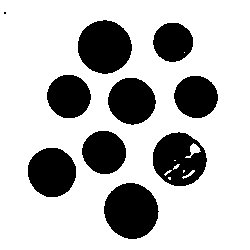

In [3]:
# Here we select T=155 as the threshold
(T, threshImg) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
print("Threshold Binary")
cv2_imshow(threshImg)

In this first example, any pixel value that is greater than 155 is set to 255. Any value that is less than 155 is set to zero.

We used the `cv2.THRESH_BINARY` method, which indicates that pixel values p greater than T are set to the maximum value (the third argument).

Threshold Binary Inverse


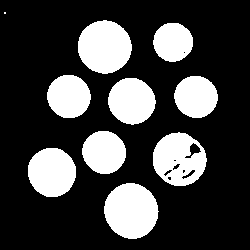

In [4]:
# Inverse thresholding
(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)

print("Threshold Binary Inverse")
cv2_imshow(threshInv)


We applied inverse thresholding rather than
normal thresholding by using `cv2.THRESH_BINARY_INV` as
our thresholding method. As we can see in the image above, our coins are now white and the background is black. This is convenient for producing a mask.

Coins


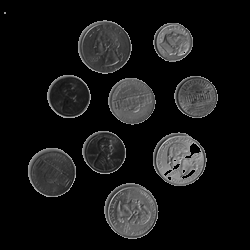

In [5]:
# Inverse thresholding image as a mask
print("Coins")
cv2_imshow(cv2.bitwise_and(image, image, mask=threshInv))

We performed masking by using the `cv2.bitwise_and` function. We supplied our original coin image as the first
two arguments, and then our inverted thresholded image as
our mask. Remember, a mask only considers pixels in the
original image where the mask is greater than zero.

Since our inverted thresholded image does a good job
at approximating the areas the coins are contained in, we
can use this inverted thresholded image as our mask.

In [6]:
# TODO repeat the above operations with an image of your choosing
# that is ease to segment.

RESOLUTION

Student: Maykol Stiven Madrid Romero


Code: T00078588

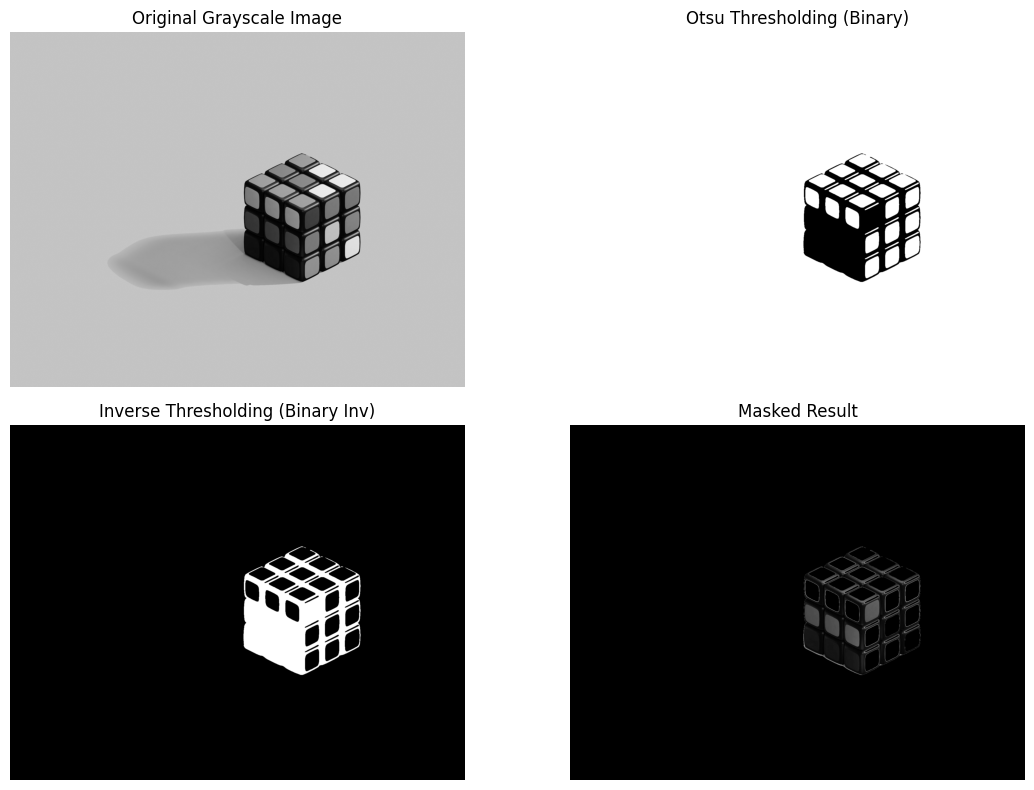

In [15]:
import numpy as np
import cv2
import urllib.request
import io
from PIL import Image
import matplotlib.pyplot as plt

# Download the image from Unsplash
image_url = 'https://images.unsplash.com/photo-1694604173127-a9b29699df5d?q=80&w=1943&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'

# Read the image from the URL
data = urllib.request.urlopen(image_url).read()
image = Image.open(io.BytesIO(data))

# Convert the image to grayscale using PIL
image_gray = image.convert('L')
image_np = np.array(image_gray)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image_np, (5, 5), 0)

# Apply Otsu's thresholding to automatically determine the threshold value
T, threshImg = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply inverse thresholding using the computed threshold value
_, threshInv = cv2.threshold(blurred, int(T), 255, cv2.THRESH_BINARY_INV)

# Mask the original grayscale image with the inverted threshold
masked_result = cv2.bitwise_and(image_np, image_np, mask=threshInv)

# Display the images
plt.figure(figsize=(12, 8))

# Original grayscale image
plt.subplot(2, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Otsu's thresholded image
plt.subplot(2, 2, 2)
plt.imshow(threshImg, cmap='gray')
plt.title('Otsu Thresholding (Binary)')
plt.axis('off')

# Inverse thresholded image
plt.subplot(2, 2, 3)
plt.imshow(threshInv, cmap='gray')
plt.title('Inverse Thresholding (Binary Inv)')
plt.axis('off')

# Masked image
plt.subplot(2, 2, 4)
plt.imshow(masked_result, cmap='gray')
plt.title('Masked Result')
plt.axis('off')

plt.tight_layout()
plt.show()


1. Original Grayscale Image
The Rubik’s cube image was converted to grayscale in order to eliminate color information and retain only light intensity. This simplification is essential for segmentation tasks, as it reduces data complexity while preserving the object’s form and structural details.

2. Otsu’s Thresholding (Binary)
Using Otsu’s method, an optimal threshold value was automatically determined to maximize the separation between bright and dark regions. The result is a binary segmentation in which the cube is clearly distinguished from the background, highlighting its main structure.

3. Inverse Thresholding (Binary Inv)
Applying the inverse threshold generates a complementary representation where the previously dark regions are shown in white and the light regions in black. This process emphasizes the object of interest (the cube) more distinctly against the homogeneous background.

4. Masked Result
Finally, the binary mask was applied to the grayscale image, preserving only the pixels corresponding to the Rubik’s cube and discarding background information. This outcome illustrates the practical use of binary masks in computer vision for extracting regions of interest.